<a href="https://colab.research.google.com/github/gobi2001-2006/computer-vision/blob/main/TRANSFORMATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Translation in image processing refers to shifting an image in the x or y direction by a specified number of pixels

Enter the translation distance for x (dx): 90
Enter the translation distance for y (dy): 23
234 366 3


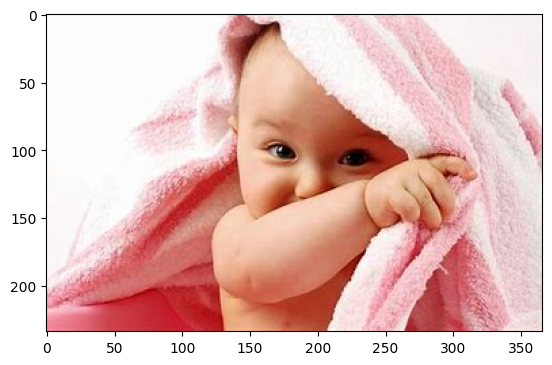

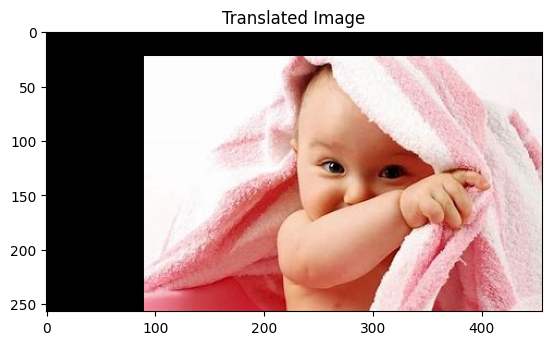

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('ai.jpeg')
rows, cols, channels = image.shape

dx = int(input("Enter the translation distance for x (dx): "))
dy = int(input("Enter the translation distance for y (dy): "))

translated_image = np.zeros((rows + dy, cols + dx, channels), dtype=np.uint8)
translated_image[dy:dy + rows, dx:dx + cols] = image[0:rows, 0:cols]

print(rows, cols, channels)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

plt.imshow(cv2.cvtColor(translated_image, cv2.COLOR_BGR2RGB))
plt.title('Translated Image')
plt.show()

Index Mapping:
For every pixel at position (i, j) in the original image, it gets mapped to (i + dy, j + dx) in the new image.
Example:
If dy = 50 and dx = 100, a pixel at (10, 20) in the original image will be moved to (10 + 50, 20 + 100).


Original Image: Size = (100, 200)
User Input: dx = 50, dy = 30
New Image: Size = (130, 250)
Pixels from (0, 0) to (99, 199) in the original image are copied to the region from (30, 50) to (129, 249) in the new image.

Enter the rotation angle (in degrees): 90


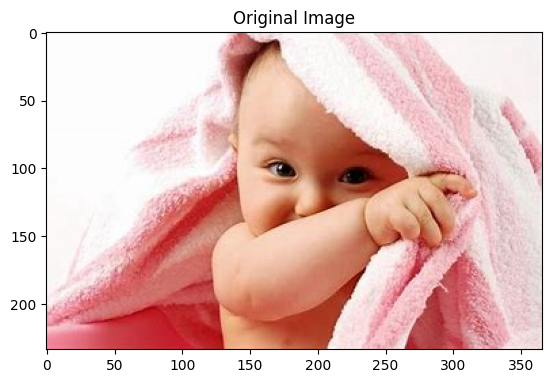

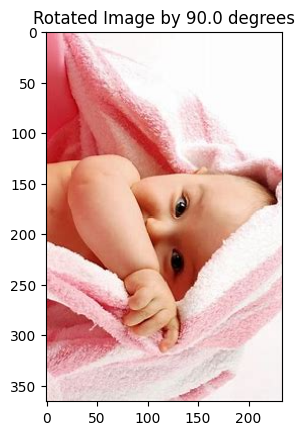

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

image = cv2.imread('ai.jpeg')
rows, cols, channels = image.shape
angle = float(input("Enter the rotation angle (in degrees): "))
theta = math.radians(angle)

abs_cos = abs(math.cos(theta))
abs_sin = abs(math.sin(theta))

new_width = int(rows * abs_sin + cols * abs_cos)
new_height = int(rows * abs_cos + cols * abs_sin)

rotated_image = np.zeros((new_height, new_width, channels), dtype=np.uint8)
center_x, center_y = cols // 2, rows // 2
new_center_x, new_center_y = new_width // 2, new_height // 2


for i in range(new_height):
    for j in range(new_width):

        x = j - new_center_x
        y = i - new_center_y

        original_x = int(x * math.cos(-theta) - y * math.sin(-theta)) + center_x
        original_y = int(x * math.sin(-theta) + y * math.cos(-theta)) + center_y


        if 0 <= original_x < cols and 0 <= original_y < rows:
            rotated_image[i, j] = image[original_y, original_x]


plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.show()

plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
plt.title(f'Rotated Image by {angle} degrees')
plt.show()


Why New Dimensions? When rotating an image, the new bounding box might be larger than the original image due to the corners rotating outward.
new_width and new_height ensure that the rotated image fits without cropping.
The formulas for the new width and height are derived from:

new_width
=
height
×
∣
sin
⁡
(
𝜃
)
∣
+
width
×
∣
cos
⁡
(
𝜃
)
∣
new_width=height×∣sin(θ)∣+width×∣cos(θ)∣
new_height
=
height
×
∣
cos
⁡
(
𝜃
)
∣
+
width
×
∣
sin
⁡
(
𝜃
)
∣
new_height=height×∣cos(θ)∣+width×∣sin(θ)∣


center_x, center_y: The center point of the original image. This is the reference point for rotation.
center
𝑥
=
width
2
center
x
​
 =
2
width
​

center
𝑦
=
height
2
center
y
​
 =
2
height
​

new_center_x, new_center_y: The center point of the new (larger) image after rotation.
This is necessary because the rotated image might be larger, and we want the rotation to appear centered in the new image.

Input Pixel: New image pixel at (i, j) = (60, 60)
Relative to New Center:
(
𝑥
,
𝑦
)
=
(
10
,
10
)
(x,y)=(10,10)
Apply Inverse Rotation (θ = 45°):
original_x
=
10
⋅
cos
⁡
(
−
45
∘
)
−
10
⋅
sin
⁡
(
−
45
∘
)
+
50
original_y
=
10
⋅
sin
⁡
(
−
45
∘
)
+
10
⋅
cos
⁡
(
−
45
∘
)
+
50
original_x
original_y
​
  
=10⋅cos(−45
∘
 )−10⋅sin(−45
∘
 )+50
=10⋅sin(−45
∘
 )+10⋅cos(−45
∘
 )+50
​

After calculating:
original_x
=
50
and
original_y
=
50
original_x=50andoriginal_y=50
This means the pixel at (60, 60) in the rotated image comes from (50, 50) in the original image.


Check Bounds:
Ensure the calculated coordinates are inside the original image. If they are outside, ignore that pixel.

Copy the Pixel:
If the coordinates are valid, copy the pixel color from (original_y, original_x) in the original image to (i, j) in the rotated image.

Original pixel at (50, 50) might map to (73.6, 100.2).
It gets rounded to (74, 100), leaving some nearby pixels empty.
Inverse Rotation (with backward mapping):
For every pixel in the rotated image, we find its original coordinates (e.g., (74, 100) → (50, 50)) and fill it without missing any pixels.

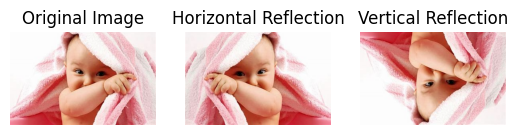

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread('ai.jpeg')
horizontal_reflection = image[:, ::-1]
vertical_reflection = image[::-1, :]
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(horizontal_reflection, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Horizontal Reflection')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(vertical_reflection, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Vertical Reflection')

plt.show()


**horizontal reflection**

: (for rows) → Select all rows (no change vertically).
[::-1] (for columns) → Reverse the order of the columns.
It takes the last column, then the second last, and so on until the first column.
This effectively mirrors the image horizontally.

**vertical reflection**

[::-1] (for rows) → Reverse the order of the rows, flipping the image from top to bottom.
: (for columns) → Select all columns (no change horizontally).

Horizontal Reflection ([:, ::-1]): Left ↔ Right
Vertical Reflection ([::-1, :]): Top ↔ Bottom

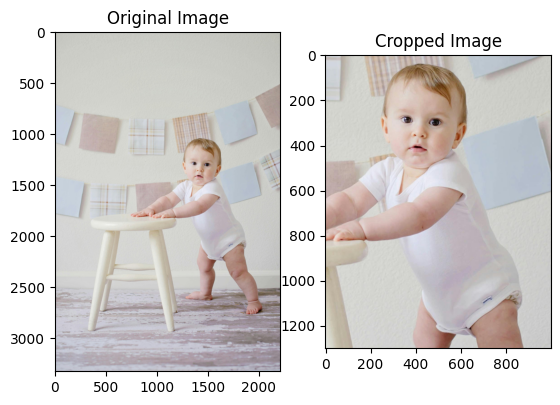

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread('PIC.jpg')

start_row, end_row = 1000, 2300
start_col, end_col = 1000, 2000
cropped_image = image[start_row:end_row, start_col:end_col]


plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.title('Cropped Image')

# Show the images
plt.show()


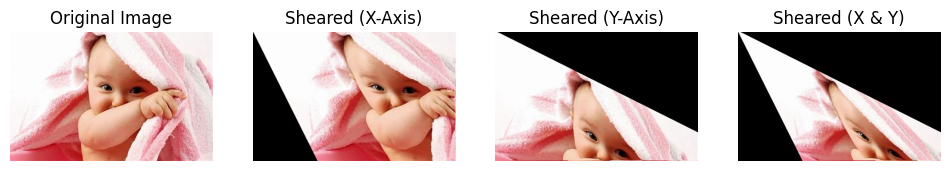

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread('ai.jpeg')

rows, cols, channels = image.shape


shear_factor_x = 0.5
shear_factor_y = 0.5

x_indices, y_indices = np.meshgrid(np.arange(cols), np.arange(rows))
new_x_indices = x_indices + shear_factor_x * y_indices
new_x_indices = np.clip(new_x_indices, 0, cols - 1)
sheared_image_x = np.zeros_like(image)
sheared_image_x[y_indices, new_x_indices.astype(int)] = image[y_indices, x_indices]

new_y_indices = y_indices + shear_factor_y * x_indices
new_y_indices = np.clip(new_y_indices, 0, rows - 1)

sheared_image_y = np.zeros_like(image)


sheared_image_y[new_y_indices.astype(int), x_indices] = image[y_indices, x_indices]

new_x_indices_both = x_indices + shear_factor_x * y_indices
new_y_indices_both = y_indices + shear_factor_y * x_indices

new_x_indices_both = np.clip(new_x_indices_both, 0, cols - 1)
new_y_indices_both = np.clip(new_y_indices_both, 0, rows - 1)

sheared_image_xy = np.zeros_like(image)


sheared_image_xy[new_y_indices_both.astype(int), new_x_indices_both.astype(int)] = image[y_indices, x_indices]
plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Original Image')

plt.subplot(1, 4, 2)
plt.imshow(cv2.cvtColor(sheared_image_x, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Sheared (X-Axis)')

plt.subplot(1, 4, 3)
plt.imshow(cv2.cvtColor(sheared_image_y, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Sheared (Y-Axis)')

plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(sheared_image_xy, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Sheared (X & Y)')


plt.show()


shear_factor_x will affect the horizontal (x-axis) shift based on the vertical (y-axis) position of pixels.
shear_factor_y will affect the vertical (y-axis) shift based on the horizontal (x-axis) position of pixels.

new_x_indices = x_indices + shear_factor_x * y_indices: This formula shifts each pixel horizontally based on its vertical position (y_indices). The higher the y value, the more the pixel is shifted along the x-axis.
For the Y-axis shear:
new_y_indices = y_indices + shear_factor_y * x_indices: This formula shifts each pixel vertically based on its horizontal position (x_indices). The higher the x value, the more the pixel is shifted along the y-axis.

If a pixel is at position
(
𝑥
=
100
,
𝑦
=
50
)
(x=100,y=50), and the shear factors are:
shear_factor_x
=
0.5
shear_factor_x=0.5
shear_factor_y
=
0.5
shear_factor_y=0.5
Then:

For X-axis shear:
new_x
=
100
+
0.5
×
50
=
100
+
25
=
125
new_x=100+0.5×50=100+25=125
For Y-axis shear:
new_y
=
50
+
0.5
×
100
=
50
+
50
=
100
new_y=50+0.5×100=50+50=100
So the pixel at position
(
100
,
50
)
(100,50) will be transformed to
(
125
,
100
)
(125,100).

Nested loops (for i in range(rows) and for j in range(cols)): These loops iterate over every pixel in the original image.
For sheared_image_x: The pixel at position (i, j) in the original image is moved to the new x-coordinate new_x_indices[i, j] while keeping the same y-coordinate i.
For sheared_image_y: The pixel is moved to the new y-coordinate new_y_indices[i, j] while keeping the same x-coordinate j.
For sheared_image_xy: The pixel is moved to both the new y-coordinate new_y_indices[i, j] and new x-coordinate new_x_indices[i, j].

If we have a pixel at position
(
𝑥
=
100
,
𝑦
=
50
)
(x=100,y=50) and the shear factors are:

shear_factor_x
=
0.5
shear_factor_x=0.5
shear_factor_y
=
0.5
shear_factor_y=0.5
For sheared_image_x:

new_x
=
100
+
0.5
×
50
=
100
+
25
=
125
new_x=100+0.5×50=100+25=125
So, the pixel at
(
100
,
50
)
(100,50) will be moved to
(
125
,
50
)
(125,50) in sheared_image_x.

For sheared_image_y:

new_y
=
50
+
0.5
×
100
=
50
+
50
=
100
new_y=50+0.5×100=50+50=100
So, the pixel at
(
100
,
50
)
(100,50) will be moved to
(
100
,
50
)
(100,50) in sheared_image_y.

For sheared_image_xy:

new_x
=
100
+
0.5
×
50
=
125
new_x=100+0.5×50=125
new_y
=
50
+
0.5
×
100
=
100
new_y=50+0.5×100=100
So, the pixel at
(
100
,
50
)
(100,50) will be moved to
(
100
,
125
)
(100,125) in sheared_image_xy.

This transformation happens for every pixel in the original image, depending on its position and the shear factors.

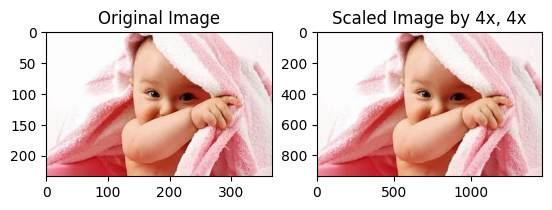

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread('ai.jpeg')

rows, cols, channels = image.shape

scale_x = 4
scale_y = 4
new_cols = int(cols * scale_x)
new_rows = int(rows * scale_y)

x_indices, y_indices = np.meshgrid(np.arange(new_cols), np.arange(new_rows))

original_x = (x_indices / scale_x).astype(int)
original_y = (y_indices / scale_y).astype(int)
scaled_image = np.zeros((new_rows, new_cols, channels), dtype=np.uint8)
scaled_image[y_indices, x_indices] = image[original_y, original_x]

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(scaled_image, cv2.COLOR_BGR2RGB))
plt.title(f'Scaled Image by {scale_x}x, {scale_y}x')

plt.show()
